In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from tabulate import tabulate

def calculate_r2(y_true, y_pred):
    """Вычисляет коэффициент детерминации R²."""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)


def tikz_convert(ax,
         clean = False, mktex = False, path = "", filename = "", caption = None):
    
    num = len(ax.get_axes()) 
    if num != 1:
        num = 2
    
    if filename == "":
        import uuid
        filename = str(uuid.uuid4()) + ".tex"
        
    if path == "":
        path = "../Obsidian"
    
    if mktex:
    
        import tikzplotlib as tikz

        def tikzplotlib_fix_ncols(obj):
            """
            workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
            """
            if hasattr(obj, "_ncols"):
                obj._ncol = obj._ncols
            for child in obj.get_children():
                tikzplotlib_fix_ncols(child)

        tikzplotlib_fix_ncols(ax)
        if clean:
            ax = tikz.clean_figure(ax)
        
        tikz.save(f"{path}/{filename}", 
                axis_width = f"\\textwidth/{num} - 2cm",
                axis_height = "9cm")
    if caption:
        print(f"""
```text
\\begin{{figure}}[H]
\\centering
[[{filename}]]
\\caption({caption})
\\end{{figure}}
```""")
    else:
        print(f"""
```text
\\begin{{figure}}[H]
\\centering
[[{filename}]]
\\end{{figure}}
```""")
    
    return None

def format_dataframe(df):
    
    def auto_format(number):
        if isinstance(number, (int, float)):
            if abs(number) >= 1000 or (abs(number) < 0.001 and number != 0):
                return f"{number:.2e}"  # Экспоненциальный формат
            else:
                return f"{number:.3f}"  # Обычный формат
        return str(number)  # Если это не число, оставляем как есть
    
    return df.applymap(auto_format)

In [43]:
# Создание DataFrame
df = pd.DataFrame({})
A_HA = (0.008 + 0.003)/2
A_A = 1.096
print(f"A_HA = {A_HA}; A_A = {A_A}")

df["pH"] = [5.326, 5.993, 6.281, 6.572, 7.125, 7.638, 
            8.148, 8.358, 8.806, 9.588, 10.079, 10.205]
df["A"] = [0.008, 0.003, 0.013, 0.022, 0.084, 0.250, 
           0.574, 0.726, 0.950, 1.065, 1.094, 1.096]

# Расчет дополнительных столбцов
df["frac"] = (df.A - A_HA)/(A_A - df.A)
df["K"] = df.frac * 10**(-df.pH)
df["pK"] = -np.log10(df.K)

# Удаление бесконечных и NaN значений для pK
pK_clean = df['pK'].replace([np.inf, -np.inf], np.nan).dropna()



display(df)

print(tabulate(format_dataframe(df),
              tablefmt = "github",
              headers = ["pH", "A", "$\\frac{A - A_{HA}}{A_{A^-} - A}$",
                        "K", "pK"]))

A_HA = 0.0055; A_A = 1.096


/usr/lib/python3/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,pH,A,frac,K,pK
0,5.326,0.008,0.002298,1.084704e-08,7.964689
1,5.993,0.003,-0.002287,-2.324448e-09,NaN
2,6.281,0.013,0.006925,3.626042e-09,8.440567
3,6.572,0.022,0.015363,4.116041e-09,8.385520
4,7.125,0.084,0.077569,5.816867e-09,8.235311
5,7.638,0.250,0.289007,6.651330e-09,8.177091
6,8.148,0.574,1.089080,7.745687e-09,8.110940
7,8.358,0.726,1.947297,8.539496e-09,8.068568
8,8.806,0.950,6.469178,1.011228e-08,7.995151
9,9.588,1.065,34.177419,8.825499e-09,8.054261


|    |     pH |     A |   $\frac{A - A_{HA}}{A_{A^-} - A}$ |          K |       pK |
|----|--------|-------|------------------------------------|------------|----------|
|  0 |  5.326 | 0.008 |                              0.002 |   1.08e-08 |    7.965 |
|  1 |  5.993 | 0.003 |                             -0.002 |  -2.32e-09 |  nan     |
|  2 |  6.281 | 0.013 |                              0.007 |   3.63e-09 |    8.441 |
|  3 |  6.572 | 0.022 |                              0.015 |   4.12e-09 |    8.386 |
|  4 |  7.125 | 0.084 |                              0.078 |   5.82e-09 |    8.235 |
|  5 |  7.638 | 0.25  |                              0.289 |   6.65e-09 |    8.177 |
|  6 |  8.148 | 0.574 |                              1.089 |   7.75e-09 |    8.111 |
|  7 |  8.358 | 0.726 |                              1.947 |   8.54e-09 |    8.069 |
|  8 |  8.806 | 0.95  |                              6.469 |   1.01e-08 |    7.995 |
|  9 |  9.588 | 1.065 |                             34.177 |   8.

/tmp/ipykernel_3735/1454864660.py:81: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(auto_format)



```text
\begin{figure}[H]
\centering
[[Зависимость поглощения от pH с линией регрессии.tex]]
\end{figure}
```


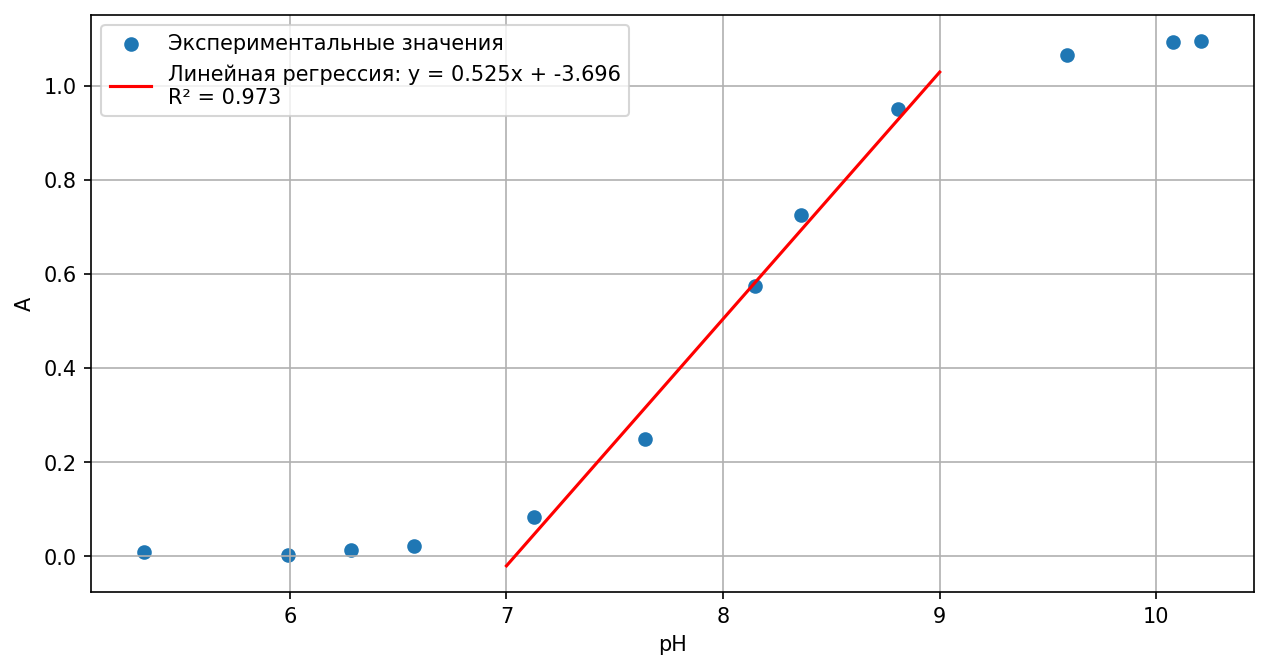

In [47]:
# График 1: Экспериментальные данные с линией регрессии
ax = plt.figure(figsize=(10, 5), dpi=150)
plt.scatter(df.pH, df.A, label="Экспериментальные значения")

# Линейная регрессия для части данных
df1 = df[4:8]
popt, pcov = curve_fit(lambda x, k, b: k*x + b, df1.pH, df1.A)
perr = np.sqrt(np.diag(pcov))
conf_int = 1.96 * perr

# Расчет R-squared
y_pred = popt[0]*df1.pH + popt[1]
r_squared = calculate_r2(df1.A, y_pred)

# Построение линии регрессии
x = np.linspace(7, 9, 100)
plt.plot(x, popt[0]*x + popt[1], 'r-', 
         label=f'Линейная регрессия: y = {popt[0]:.3f}x + {popt[1]:.3f}\nR² = {r_squared:.3f}')

plt.xlabel("pH")
plt.ylabel("A")
plt.legend()
plt.grid()
#plt.title("Зависимость поглощения от pH с линией регрессии")
#plt.show()


tikz_convert(ax,
             clean = False, 
             mktex = True, 
             path = "", 
             filename = "Зависимость поглощения от pH с линией регрессии.tex", caption = None)


```text
\begin{figure}[H]
\centering
[[Зависимость поглощения от pH с линией регрессии.tex]]
\end{figure}
```


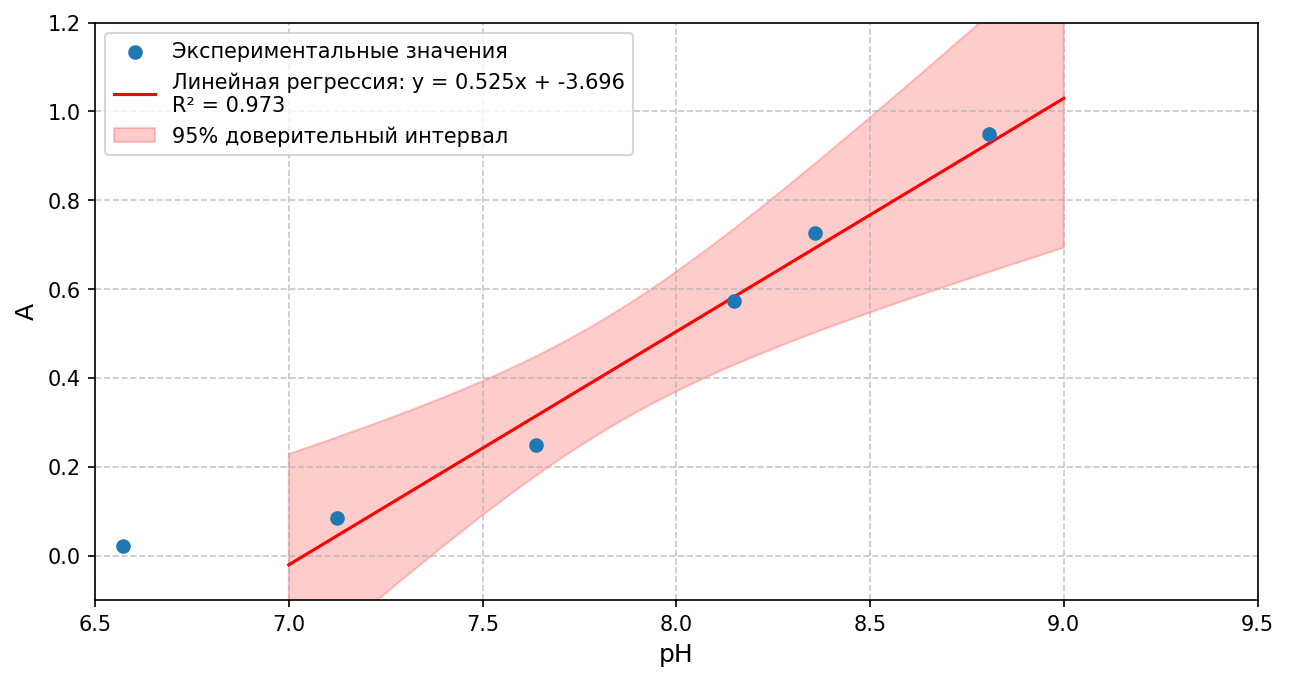

In [45]:
# График 1: Экспериментальные данные с линией регрессии и доверительным интервалом
ax = plt.figure(figsize=(10, 5), dpi=150)
plt.scatter(df.pH, df.A, label="Экспериментальные значения", zorder=3)

# Линейная регрессия для части данных
df1 = df[4:8]
popt, pcov = curve_fit(lambda x, k, b: k*x + b, df1.pH, df1.A)
perr = np.sqrt(np.diag(pcov))
conf_int = 1.96 * perr

# Расчет R-squared
y_pred = popt[0]*df1.pH + popt[1]
r_squared = calculate_r2(df1.A, y_pred)

# Генерация точек для линии регрессии
x = np.linspace(7, 9, 100)
y = popt[0]*x + popt[1]

# Расчет доверительного интервала для регрессии
def confidence_band(x, popt, pcov, alpha=0.05):
    n = len(df1.pH)
    m = len(popt)
    dof = max(0, n - m)
    t_val = stats.t.ppf(1 - alpha/2, dof)
    
    y = popt[0]*x + popt[1]
    x_mean = np.mean(df1.pH)
    s_err = np.sqrt(np.sum((df1.A - y_pred)**2) / dof)
    ci = t_val * s_err * np.sqrt(1/n + (x - x_mean)**2 / np.sum((df1.pH - x_mean)**2))
    return y - ci, y + ci

lower, upper = confidence_band(x, popt, pcov)

# Построение графика
plt.plot(x, y, 'r-', label=f'Линейная регрессия: y = {popt[0]:.3f}x + {popt[1]:.3f}\nR² = {r_squared:.3f}')
plt.fill_between(x, lower, upper, color='red', alpha=0.2, label='95% доверительный интервал')

plt.xlabel("pH", fontsize=12)
plt.ylabel("A", fontsize=12)
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Настройка осей
plt.xlim(6.5, 9.5)
plt.ylim(-0.1, 1.2)

# Сохранение в TikZ
tikz_convert(ax,
             clean=False, 
             mktex=True, 
             path="", 
             filename="Зависимость поглощения от pH с линией регрессии.tex", 
             caption=None)

In [ ]:
# График 2: Гистограмма pK
plt.figure(figsize=(10, 5), dpi=150)
if not pK_clean.empty:
    plt.hist(pK_clean, bins=5, edgecolor='black')
    plt.xlabel('pK')
    plt.ylabel('Частота')
    plt.title('Распределение значений pK')
    plt.grid()
else:
    plt.text(0.5, 0.5, 'Нет корректных данных для pK', 
             ha='center', va='center')
plt.show()

In [46]:
# Выделяем линейный участок (индексы 4-7, как в регрессии)
pK_linear = df.loc[4:7, 'pK'].replace([np.inf, -np.inf], np.nan).dropna()

if not pK_linear.empty:
    print("\nСТАТИСТИКА ДЛЯ pK НА ЛИНЕЙНОМ УЧАСТКЕ (pH 7.1-8.4):")
    print("-----------------------------------------------")
    
    # Основные статистики
    n = len(pK_linear)
    mean_val = pK_linear.mean()
    sem_val = pK_linear.sem()
    std_val = pK_linear.std()
    
    print(f"Количество значений: {n}")
    print(f"Среднее значение: {mean_val:.4f} ± {sem_val:.4f} (стандартная ошибка)")
    print(f"Стандартное отклонение: {std_val:.4f}")
    print(f"Медиана: {pK_linear.median():.4f}")
    print(f"Диапазон: [{pK_linear.min():.4f}, {pK_linear.max():.4f}]")
    
    # Доверительные интервалы
    if n > 1:
        # 95% доверительный интервал (t-распределение)
        t_critical = stats.t.ppf(0.975, df=n-1)
        ci_95_low, ci_95_high = stats.t.interval(0.95, n-1, loc=mean_val, scale=sem_val)
        
        # 68% доверительный интервал (аналог ±SEM)
        ci_68_low, ci_68_high = stats.t.interval(0.68, n-1, loc=mean_val, scale=sem_val)
        
        print("\nДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ СРЕДНЕГО:")
        print(f"68% дов. интервал (аналог ±SEM): {mean_val:.4f} ± {mean_val-ci_68_low:.4f}")
        print(f"95% дов. интервал: [{ci_95_low:.4f}, {ci_95_high:.4f}]")
        print(f"Критическое значение t (95%): {t_critical:.4f}")
    
    # Дополнительные показатели
    print("\nДОПОЛНИТЕЛЬНЫЕ ПОКАЗАТЕЛИ:")
    print(f"Коэффициент вариации: {(std_val/mean_val)*100:.2f}%")
    print(f"Межквартильный размах: {np.percentile(pK_linear, 75) - np.percentile(pK_linear, 25):.4f}")
    print(f"Skewness (асимметрия): {stats.skew(pK_linear):.4f}")
    print(f"Kurtosis (эксцесс): {stats.kurtosis(pK_linear):.4f}")
    
    # Точечная оценка с указанием точности
    print("\nИТОГОВАЯ ОЦЕНКА:")
    print(f"pK = {mean_val:.4f} ± {sem_val:.4f} (SEM, n={n})")
    print(f"Или в виде 95% дов. интервала: {mean_val:.4f} [{ci_95_low:.4f}, {ci_95_high:.4f}]")
    
else:
    print("\nНет корректных данных для pK на линейном участке")


СТАТИСТИКА ДЛЯ pK НА ЛИНЕЙНОМ УЧАСТКЕ (pH 7.1-8.4):
-----------------------------------------------
Количество значений: 4
Среднее значение: 8.1480 ± 0.0367 (стандартная ошибка)
Стандартное отклонение: 0.0734
Медиана: 8.1440
Диапазон: [8.0686, 8.2353]

ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ СРЕДНЕГО:
68% дов. интервал (аналог ±SEM): 8.1480 ± 0.0436
95% дов. интервал: [8.0312, 8.2647]
Критическое значение t (95%): 3.1824

ДОПОЛНИТЕЛЬНЫЕ ПОКАЗАТЕЛИ:
Коэффициент вариации: 0.90%
Межквартильный размах: 0.0913
Skewness (асимметрия): 0.1356
Kurtosis (эксцесс): -1.4586

ИТОГОВАЯ ОЦЕНКА:
pK = 8.1480 ± 0.0367 (SEM, n=4)
Или в виде 95% дов. интервала: 8.1480 [8.0312, 8.2647]
